Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Data Collection & Pre-Processing

In [2]:
# loading the data from csv file to a pandas Dataframe
raw_mail_data = pd.read_csv('spam ham.csv')

In [3]:
print(raw_mail_data)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham              Will Ì_ b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [4]:
# replace the null values with a null string
mail_data = raw_mail_data.where((pd.notnull(raw_mail_data)),'')

In [5]:
# printing the first 5 rows of the dataframe
mail_data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
# checking the number of rows and columns in the dataframe
mail_data.shape

(5572, 2)

# Label Encoding

In [7]:
# label spam mail as 0;  ham mail as 1;

mail_data.loc[mail_data['Category'] == 'spam', 'Category',] = 0
mail_data.loc[mail_data['Category'] == 'ham', 'Category',] = 1

spam  -  0

ham  -  1

Model Evalaution

In [8]:
# separating the data as texts and label

X = mail_data['Message']

Y = mail_data['Category']

In [9]:
print(X)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                Will Ì_ b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [10]:
print(Y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


# Splitting the data into training data & test data

In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=3)

In [12]:
print(X.shape)
print(X_train.shape)
print(X_test.shape)

(5572,)
(4457,)
(1115,)


# Feature Extraction

In [13]:
# transform the text data to feature vectors that can be used as input to the Logistic regression

feature_extraction = TfidfVectorizer(min_df=1, stop_words='english', lowercase=True)
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# convert Y_train and Y_test values as integers

Y_train = Y_train.astype('int')
Y_test = Y_test.astype('int')

In [14]:
print(X_train)

3075    Mum, hope you are having a great day. Hoping t...
1787                           Yes:)sura in sun tv.:)lol.
1614    Me sef dey laugh you. Meanwhile how's my darli...
4304                Yo come over carlos will be here soon
3266                    Ok then i come n pick u at engin?
                              ...                        
789                          Gud mrng dear hav a nice day
968             Are you willing to go for aptitude class.
1667    So now my dad is gonna call after he gets out ...
3321    Ok darlin i supose it was ok i just worry too ...
1688                     Nan sonathaya soladha. Why boss?
Name: Message, Length: 4457, dtype: object


In [15]:
print(X_train_features)

  (0, 741)	0.3219352588930141
  (0, 3979)	0.2410582143632299
  (0, 4296)	0.3891385935794867
  (0, 6599)	0.20296878731699391
  (0, 3386)	0.3219352588930141
  (0, 2122)	0.38613577623520473
  (0, 3136)	0.440116181574609
  (0, 3262)	0.25877035357606315
  (0, 3380)	0.21807195185332803
  (0, 4513)	0.2909649098524696
  (1, 4061)	0.380431198316959
  (1, 6872)	0.4306015894277422
  (1, 6417)	0.4769136859540388
  (1, 6442)	0.5652509076654626
  (1, 7443)	0.35056971070320353
  (2, 933)	0.4917598465723273
  (2, 2109)	0.42972812260098503
  (2, 3917)	0.40088501350982736
  (2, 2226)	0.413484525934624
  (2, 5825)	0.4917598465723273
  (3, 6140)	0.4903863168693604
  (3, 1599)	0.5927091854194291
  (3, 1842)	0.3708680641487708
  (3, 7453)	0.5202633571003087
  (4, 2531)	0.7419319091456392
  :	:
  (4452, 2122)	0.31002103760284144
  (4453, 999)	0.6760129013031282
  (4453, 7273)	0.5787739591782677
  (4453, 1762)	0.45610005640082985
  (4454, 3029)	0.42618909997886
  (4454, 2086)	0.3809693742808703
  (4454, 3088)

# Training the Model

# Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [17]:
model = LogisticRegression()

In [18]:
# training the Logistic Regression model with the training data
model.fit(X_train_features, Y_train)

LogisticRegression()

Evaluating the trained model

In [19]:
# prediction on training data

prediction_on_training_data = model.predict(X_train_features)
accuracy_on_training_data = accuracy_score(Y_train, prediction_on_training_data)

In [20]:
print('Accuracy on training data : ', accuracy_on_training_data)

Accuracy on training data :  0.9661207089970832


In [21]:
# prediction on test data

prediction_on_test_data = model.predict(X_test_features)
accuracy_on_test_data = accuracy_score(Y_test, prediction_on_test_data)

In [22]:
print('Accuracy on test data : ', accuracy_on_test_data)

Accuracy on test data :  0.9623318385650225


Building a Predictive System

In [23]:
input_mail = ["I've been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times"]

# convert text to feature vectors
input_data_features = feature_extraction.transform(input_mail)

# making prediction

prediction = model.predict(input_data_features)
print(prediction)


if (prediction[0]==1):
  print('Ham mail')

else:
  print('Spam mail')

[1]
Ham mail


# Naive Bayes 

In [24]:
from sklearn.naive_bayes import GaussianNB

In [25]:
# Split data into features (X) and target labels (Y)
X = mail_data['Message']
Y = mail_data['Category']

In [26]:
# Split data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [27]:
from sklearn.feature_extraction.text import CountVectorizer

In [28]:
# Vectorize the text data
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [29]:
from sklearn.preprocessing import LabelEncoder

# Encode the categorical labels
label_encoder = LabelEncoder()
Y_train_encoded = label_encoder.fit_transform(Y_train)

# Create and train the Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()
naive_bayes_classifier.fit(X_train_vec, Y_train_encoded)

MultinomialNB()

In [30]:
# Predictions on the test set
Y_pred = naive_bayes_classifier.predict(X_test_vec)

# Confusion Matrix"

In [31]:
from sklearn.metrics import confusion_matrix

# Convert Y_test to numerical labels if needed
if Y_test.dtype == object:
    label_encoder = LabelEncoder()
    Y_test_encoded = label_encoder.fit_transform(Y_test)
else:
    Y_test_encoded = Y_test

# Calculate confusion matrix
conf_matrix = confusion_matrix(Y_test_encoded, Y_pred)

# Print confusion matrix
print("Confusion Matrix:")
print(conf_matrix)

Confusion Matrix:
[[134  16]
 [  2 963]]


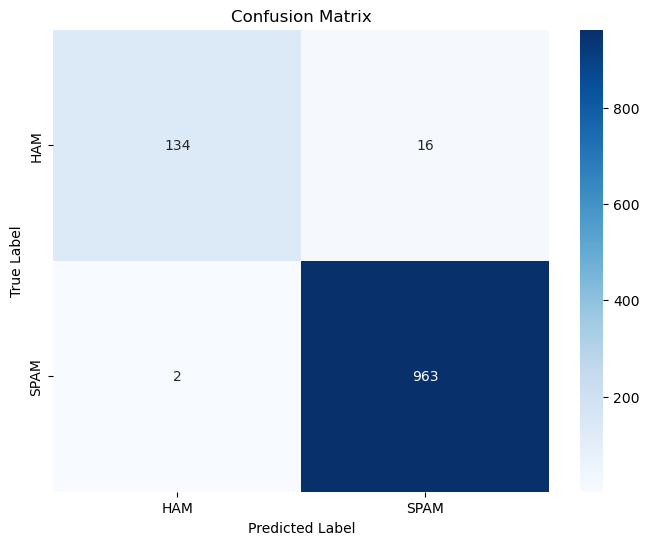

In [32]:
# Calculate confusion matrix
conf_matrix = confusion_matrix(Y_test_encoded, Y_pred)

# Plot confusion matrix as a heatmap
plt.figure(figsize=(8, 6))
sn.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=['HAM', 'SPAM'], yticklabels=['HAM', 'SPAM'])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

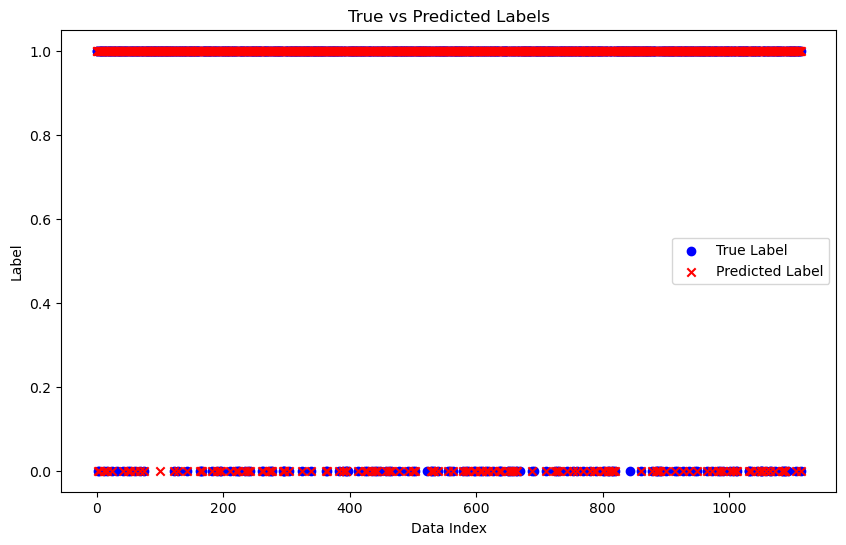

In [33]:
import matplotlib.pyplot as plt

# Define markers for true labels and predicted labels
true_label_markers = ['o' if label == 0 else 's' for label in Y_test_encoded]
predicted_label_markers = ['+' if label == 0 else 'x' for label in Y_pred]

# Plot the data points
plt.figure(figsize=(10,6))
plt.scatter(range(len(Y_test_encoded)), Y_test_encoded, marker='o', label='True Label', color='blue')
plt.scatter(range(len(Y_pred)), Y_pred, marker='x', label='Predicted Label', color='red')

# Set labels and title
plt.xlabel('Data Index')
plt.ylabel('Label')
plt.title('True vs Predicted Labels')
plt.legend()

# Show plot
plt.show()

In [34]:
from sklearn.preprocessing import LabelEncoder

# If Y_test is originally in object type (e.g., strings), encode it into numerical values
if Y_test.dtype == object:
    label_encoder = LabelEncoder()
    Y_test_encoded = label_encoder.fit_transform(Y_test)
else:
    Y_test_encoded = Y_test

# Calculate accuracy using the encoded Y_test
accuracy = accuracy_score(Y_test_encoded, Y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9838565022421525


In [35]:
# Generate classification report
print(classification_report(Y_test_encoded, Y_pred))

              precision    recall  f1-score   support

           0       0.99      0.89      0.94       150
           1       0.98      1.00      0.99       965

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [36]:
import random
# Number of emails to classify
num_emails = 5

# Iterate through the emails
for _ in range(num_emails):
    # Randomly select an email message from the dataset
    new_email_message = random.choice(mail_data['Message'])

    # Transform the new email message into a feature vector using the same vectorizer used for training
    new_email_features = vectorizer.transform([new_email_message])

    # Predict the category (ham or spam) for the new email
    prediction = naive_bayes_classifier.predict(new_email_features)

     # Print the message along with the prediction result
    print("Message:", new_email_message)
    if prediction[0] == 0:
        print("Prediction: HAM")
    else:
        print("Prediction: SPAM")
    print()  # Add a blank line for readability between emails

Message: You have an important customer service announcement. Call FREEPHONE 0800 542 0825 now!
Prediction: HAM

Message: Gettin rdy to ship comp
Prediction: SPAM

Message: Well I wasn't available as I washob nobbing with last night so they had to ask Nickey Platt instead of me!;
Prediction: SPAM

Message: Under the sea, there lays a rock. In the rock, there is an envelope. In the envelope, there is a paper. On the paper, there are 3 words... '
Prediction: SPAM

Message: Nvm it's ok...
Prediction: SPAM



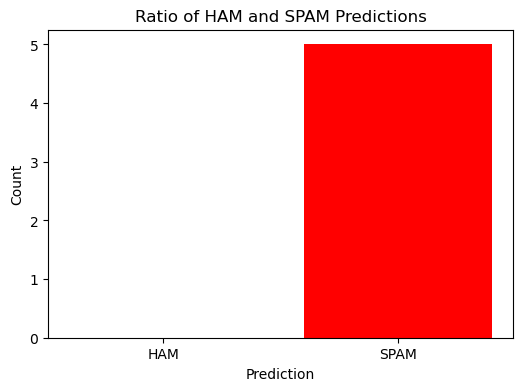

In [37]:
# Number of emails to classify
num_emails = 5

# Initialize variables to count HAM and SPAM predictions
ham_count = 0
spam_count = 0

# Iterate through the emails
for _ in range(num_emails):
    # Randomly select an email message from the dataset
    new_email_message = random.choice(mail_data['Message'])
    
    # Transform the new email message into a feature vector using the same vectorizer used for training
    new_email_features = vectorizer.transform([new_email_message])

    # Predict the category (ham or spam) for the new email
    prediction = naive_bayes_classifier.predict(new_email_features)
    
    # Update counts based on prediction
    if prediction[0] == 0:
        ham_count += 1
    else:
        spam_count += 1

# Plot the ratio of HAM and SPAM predictions
plt.figure(figsize=(6, 4))
plt.bar(['HAM', 'SPAM'], [ham_count, spam_count], color=['blue', 'red'])
plt.xlabel('Prediction')
plt.ylabel('Count')
plt.title('Ratio of HAM and SPAM Predictions')
plt.show()